In [77]:
import pandas as pd
import numpy as np
import requests
import pprint
from matplotlib import pyplot as plt
import seaborn as sns

In [78]:
#Endpoint TSE com resultados atualizados - 10s:
url='https://resultados.tse.jus.br/oficial/ele2022/544/dados-simplificados/br/br-c0001-e000544-r.json'

#Fazendo a requisição na URL:
re=requests.get(url).json()
candidatos = re['cand'][0:10]

In [79]:
df=pd.DataFrame(candidatos)
df=df[['nm','n','dvt','vap','pvap']]
df.rename(columns={'nm':'Nome do Candidato',
                'n':'Numero do Candidato',
                'dvt':'Validade',
                'vap':'Votos',
                'pvap':'(%) Votos'}, inplace=True)

df['Horario Atualização']=re['hg']
df['(%) Votos']=df['(%) Votos'].str.replace(',','.')
df['(%) Votos']=df['(%) Votos'].astype(float)
df['Votos']=df['Votos'].astype(int)
df['Nome do Candidato']=df['Nome do Candidato'].str.replace('D&apos;',"D'")
df=df.sort_values(by='Votos', ascending=False)

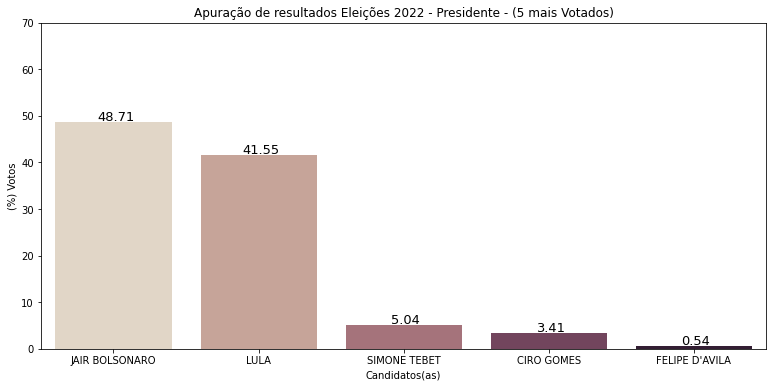

In [80]:
fig, axs = plt.subplots(ncols=1, figsize=(13,6))

ax1 = sns.barplot(
    x="Nome do Candidato",
    y='(%) Votos',
    data=df[:5],
    palette="ch:.25",
    ax=axs)

ax1.set(xlabel="Candidatos(as)",
        ylabel="(%) Votos",
        title="Apuração de resultados Eleições 2022 - Presidente - (5 mais Votados)",
        ylim=(0,70))


# Adicionando rotulo com valores no gráfico ax1:
for p in ax1.patches:
            ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=13, color='black', xytext=(2, 5),
                textcoords='offset points')

plt.show()


In [81]:
df

,Nome do Candidato,Numero do Candidato,Validade,Votos,(%) Votos,Horario Atualização
0,JAIR BOLSONARO,22,Válido,1057329,48.71,17:54:00
1,LULA,13,Válido,901987,41.55,17:54:00
2,SIMONE TEBET,15,Válido,109351,5.04,17:54:00
3,CIRO GOMES,12,Válido,74129,3.41,17:54:00
4,FELIPE D'AVILA,30,Válido,11820,0.54,17:54:00
5,SORAYA THRONICKE,44,Válido,10621,0.49,17:54:00
6,PADRE KELMON,14,Válido,1872,0.09,17:54:00
7,SOFIA MANZANO,21,Válido,1158,0.05,17:54:00
8,LÉO PÉRICLES,80,Válido,1145,0.05,17:54:00
9,VERA,16,Válido,741,0.03,17:54:00


In [82]:
print (f'Sessões Totais: {re["s"]}')
print (f'Sessões Apuradas: {re["st"]}')
pct=int(re['st'])/int(re['s'])*100
print (f'Percentual de sessões apuradas: {round(pct,4)}%')


Sessões Totais: 472075
Sessões Apuradas: 8948
Percentual de sessões apuradas: 1.8955%
